In [26]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import warnings
warnings.simplefilter('ignore')

In [29]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [30]:
print(os.path.exists("/content/drive/MyDrive/SS/weatherAUS_modf.csv"))

True


In [31]:
ds = pd.read_csv("/content/drive/MyDrive/SS/weatherAUS_modf.csv")

In [32]:
ds.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.523629,0.001617,0.8750,0.294574,0.8750,0.9375,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0.5,0.0
1,0.041667,0.375000,0.565217,0.000000,0.9375,0.294574,0.4375,1.0000,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0.5,0.0
2,0.041667,0.504717,0.576560,0.000000,1.0000,0.310078,0.8750,1.0000,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0.5,0.0
3,0.041667,0.417453,0.620038,0.000000,0.3125,0.139535,0.6250,0.0000,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0.5,0.0
4,0.041667,0.613208,0.701323,0.002695,0.8750,0.271318,0.0625,0.5000,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0.5,0.0


In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  float64
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  float64
 7   WindDir3pm     142193 non-null  float64
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  float64
 17  RainTomorrow   142193 non-nul

In [34]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [35]:
X = ds.drop(['RainTomorrow'], axis=1)
Y = ds['RainTomorrow']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_rem, Y_train, Y_rem = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem, Y_rem, test_size=0.5, stratify=Y_rem, random_state=0)

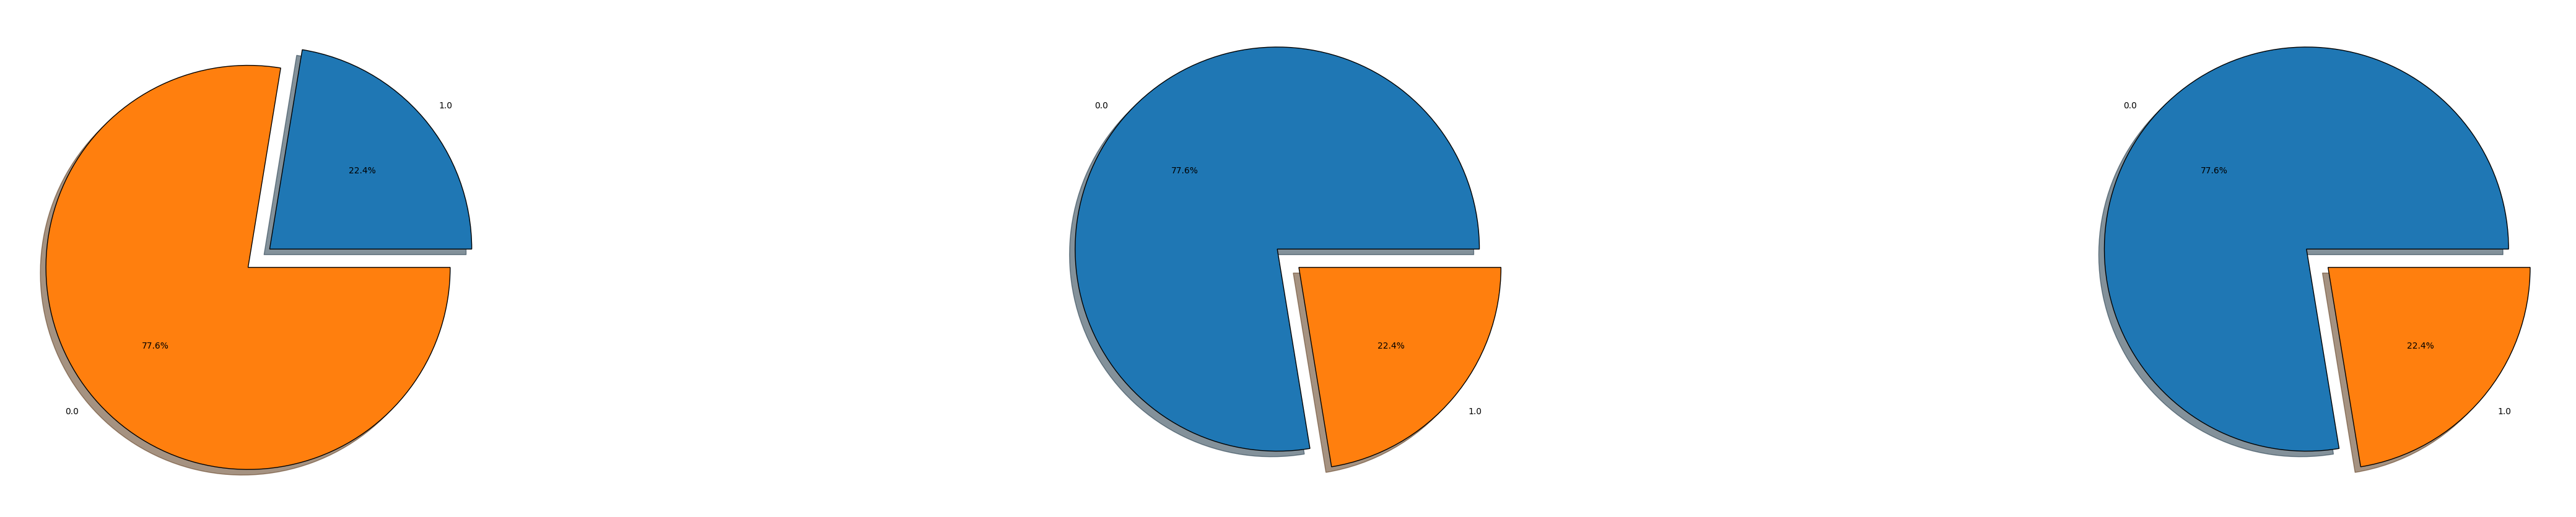

In [37]:
for i, y_set in enumerate([Y_train, Y_valid, Y_test]):
    plt.subplot(6, 3, i + 1)
    plt.rcParams["figure.figsize"] = (50, 50)
    labels = y_set.astype('str').unique().tolist()
    slices = [y_set.astype('str').value_counts()[i] for i in labels]
    plt.pie(slices, labels=labels, explode=[0.07 for i in range(len(labels))], wedgeprops={'edgecolor':'black'}, shadow=True, autopct='%1.1f%%')
    plt.tight_layout()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [39]:
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'SGD': SGDClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(verbose=0),
    'Extra Trees': ExtraTreesClassifier(verbose=0),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(verbose=0),
    'Naive Bayes': GaussianNB()
}

In [40]:
# create a function to fit, predict and evaluate models
def fit_predict_score(model, X_train, Y_train, X_valid, Y_valid):
    model.fit(X_train, Y_train)
    Y_pred = np.round(model.predict(X_valid.values))
    return metrics.accuracy_score(Y_valid, Y_pred), metrics.f1_score(Y_valid, Y_pred, average='weighted')

# create a function to evaluate models
def evaluate_models(models, X_train, Y_train, X_valid, Y_valid):
    results = {'Model': [], 'Accuracy': [], 'F1 Score': []}
    for model_name, model in models.items():
        print(f'Evaluating {model_name}...')
        accuracy, f1 = fit_predict_score(model, X_train, Y_train, X_valid, Y_valid)
        results['Model'].append(model_name)
        results['Accuracy'].append(accuracy)
        results['F1 Score'].append(f1)
    return pd.DataFrame(results)

# evaluate models
results = evaluate_models(models, X_train, Y_train, X_valid, Y_valid)

Evaluating K-Nearest Neighbors...
Evaluating SVM...
Evaluating SGD...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Extra Trees...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating Naive Bayes...


In [41]:
results.sort_values('F1 Score', ascending=False)

,Model,Accuracy,F1 Score
4,Random Forest,0.853576,0.842544
5,Extra Trees,0.854068,0.841719
7,Gradient Boosting,0.845981,0.834036
1,SVM,0.846614,0.829919
6,AdaBoost,0.841058,0.829169
0,K-Nearest Neighbors,0.832618,0.822024
2,SGD,0.835572,0.811259
8,Naive Bayes,0.806878,0.802877
3,Decision Tree,0.784725,0.785516


In [43]:
from numpy import array
from sklearn.model_selection import KFold


# split train/test data
X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.8)


# prepare cross validation
kfold = KFold(n_splits=8, shuffle=True, random_state=20)
# enumerate splits
for train, test in kfold.split(X_train):
    classifier = RandomForestClassifier()
    classifier.fit(X_train.iloc[train], Y_train.iloc[train])
    Y_pred = classifier.predict(X_train.iloc[test])
    print('k-fold set metrics: ', metrics.classification_report(Y_train.iloc[test], Y_pred))

Y_pred = classifier.predict(X_test)
print('#-----------------------------------------------------------------------#')
print('test set metrics: ', metrics.classification_report(Y_test, Y_pred))


k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11000
         1.0       0.76      0.50      0.60      3220

    accuracy                           0.85     14220
   macro avg       0.81      0.72      0.75     14220
weighted avg       0.84      0.85      0.84     14220

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     11061
         1.0       0.75      0.50      0.60      3159

    accuracy                           0.85     14220
   macro avg       0.81      0.73      0.76     14220
weighted avg       0.84      0.85      0.84     14220

k-fold set metrics:                precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     11046
         1.0       0.76      0.53      0.62      3173

    accuracy                           0.86     14219
   macro avg       0.82      0.74      0.77     14219
weighted av

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

[[10880   152]
 [  491  2697]]


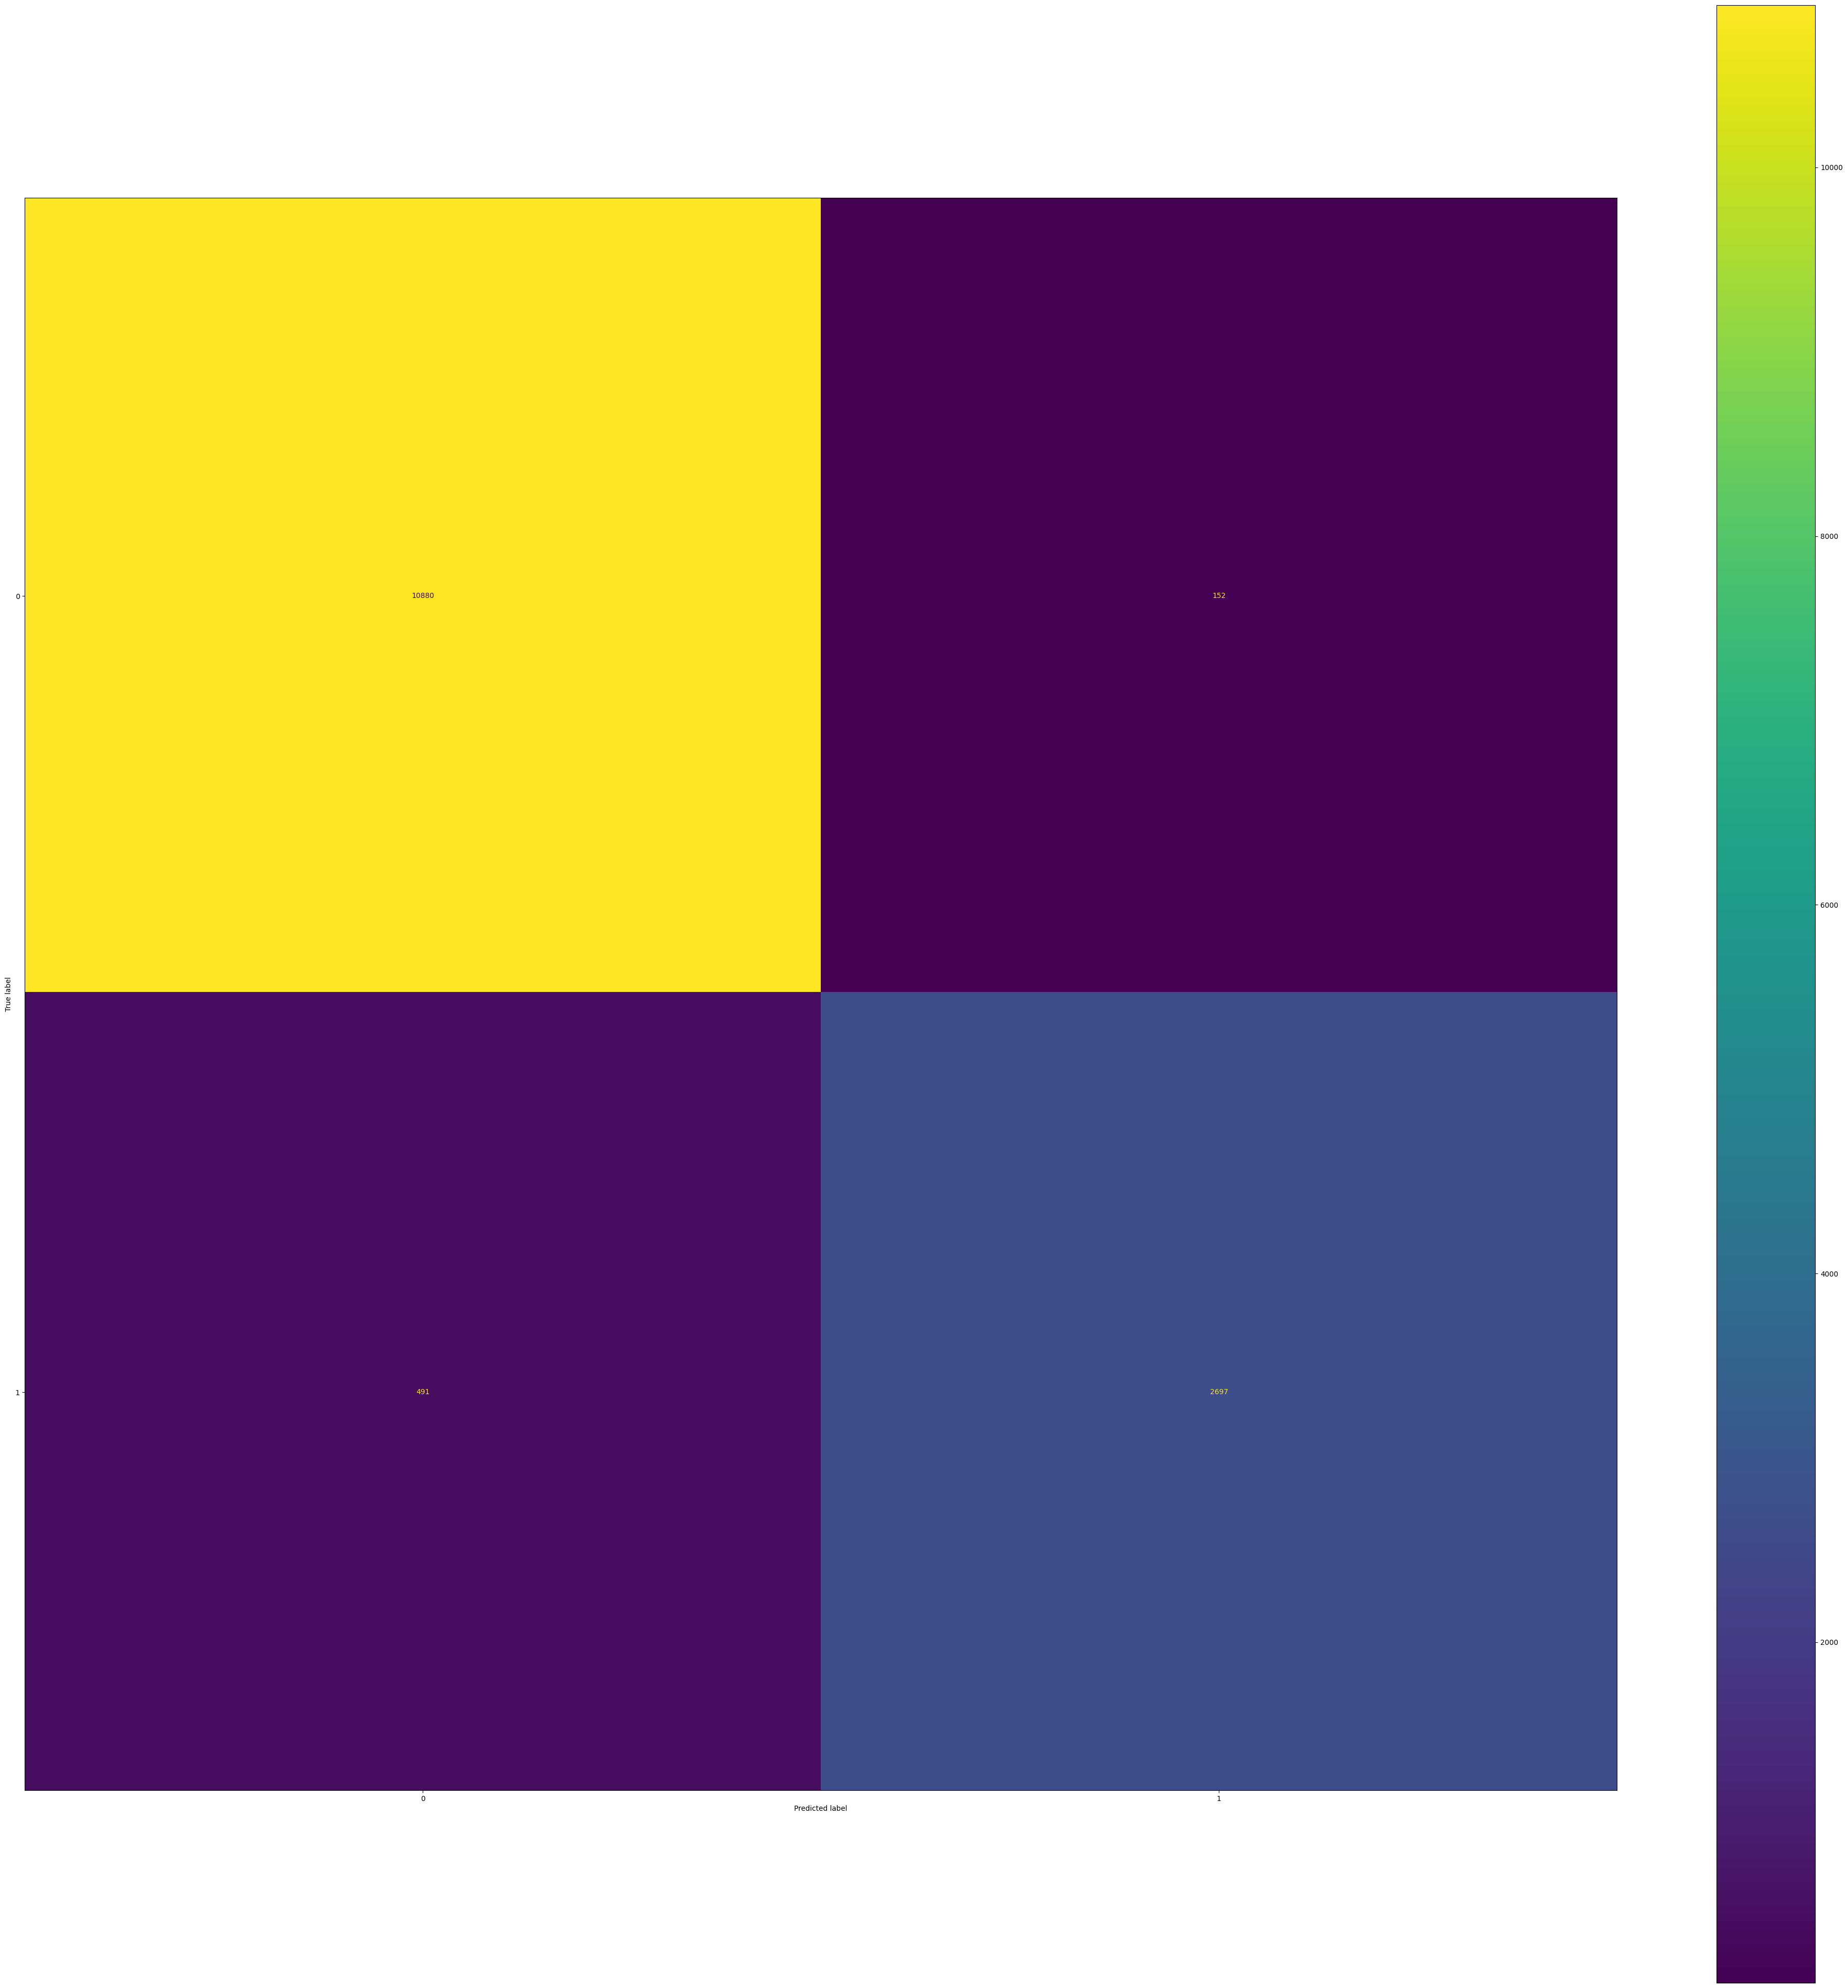

In [45]:
conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)


In [47]:
roc_auc

0.9161034217328761

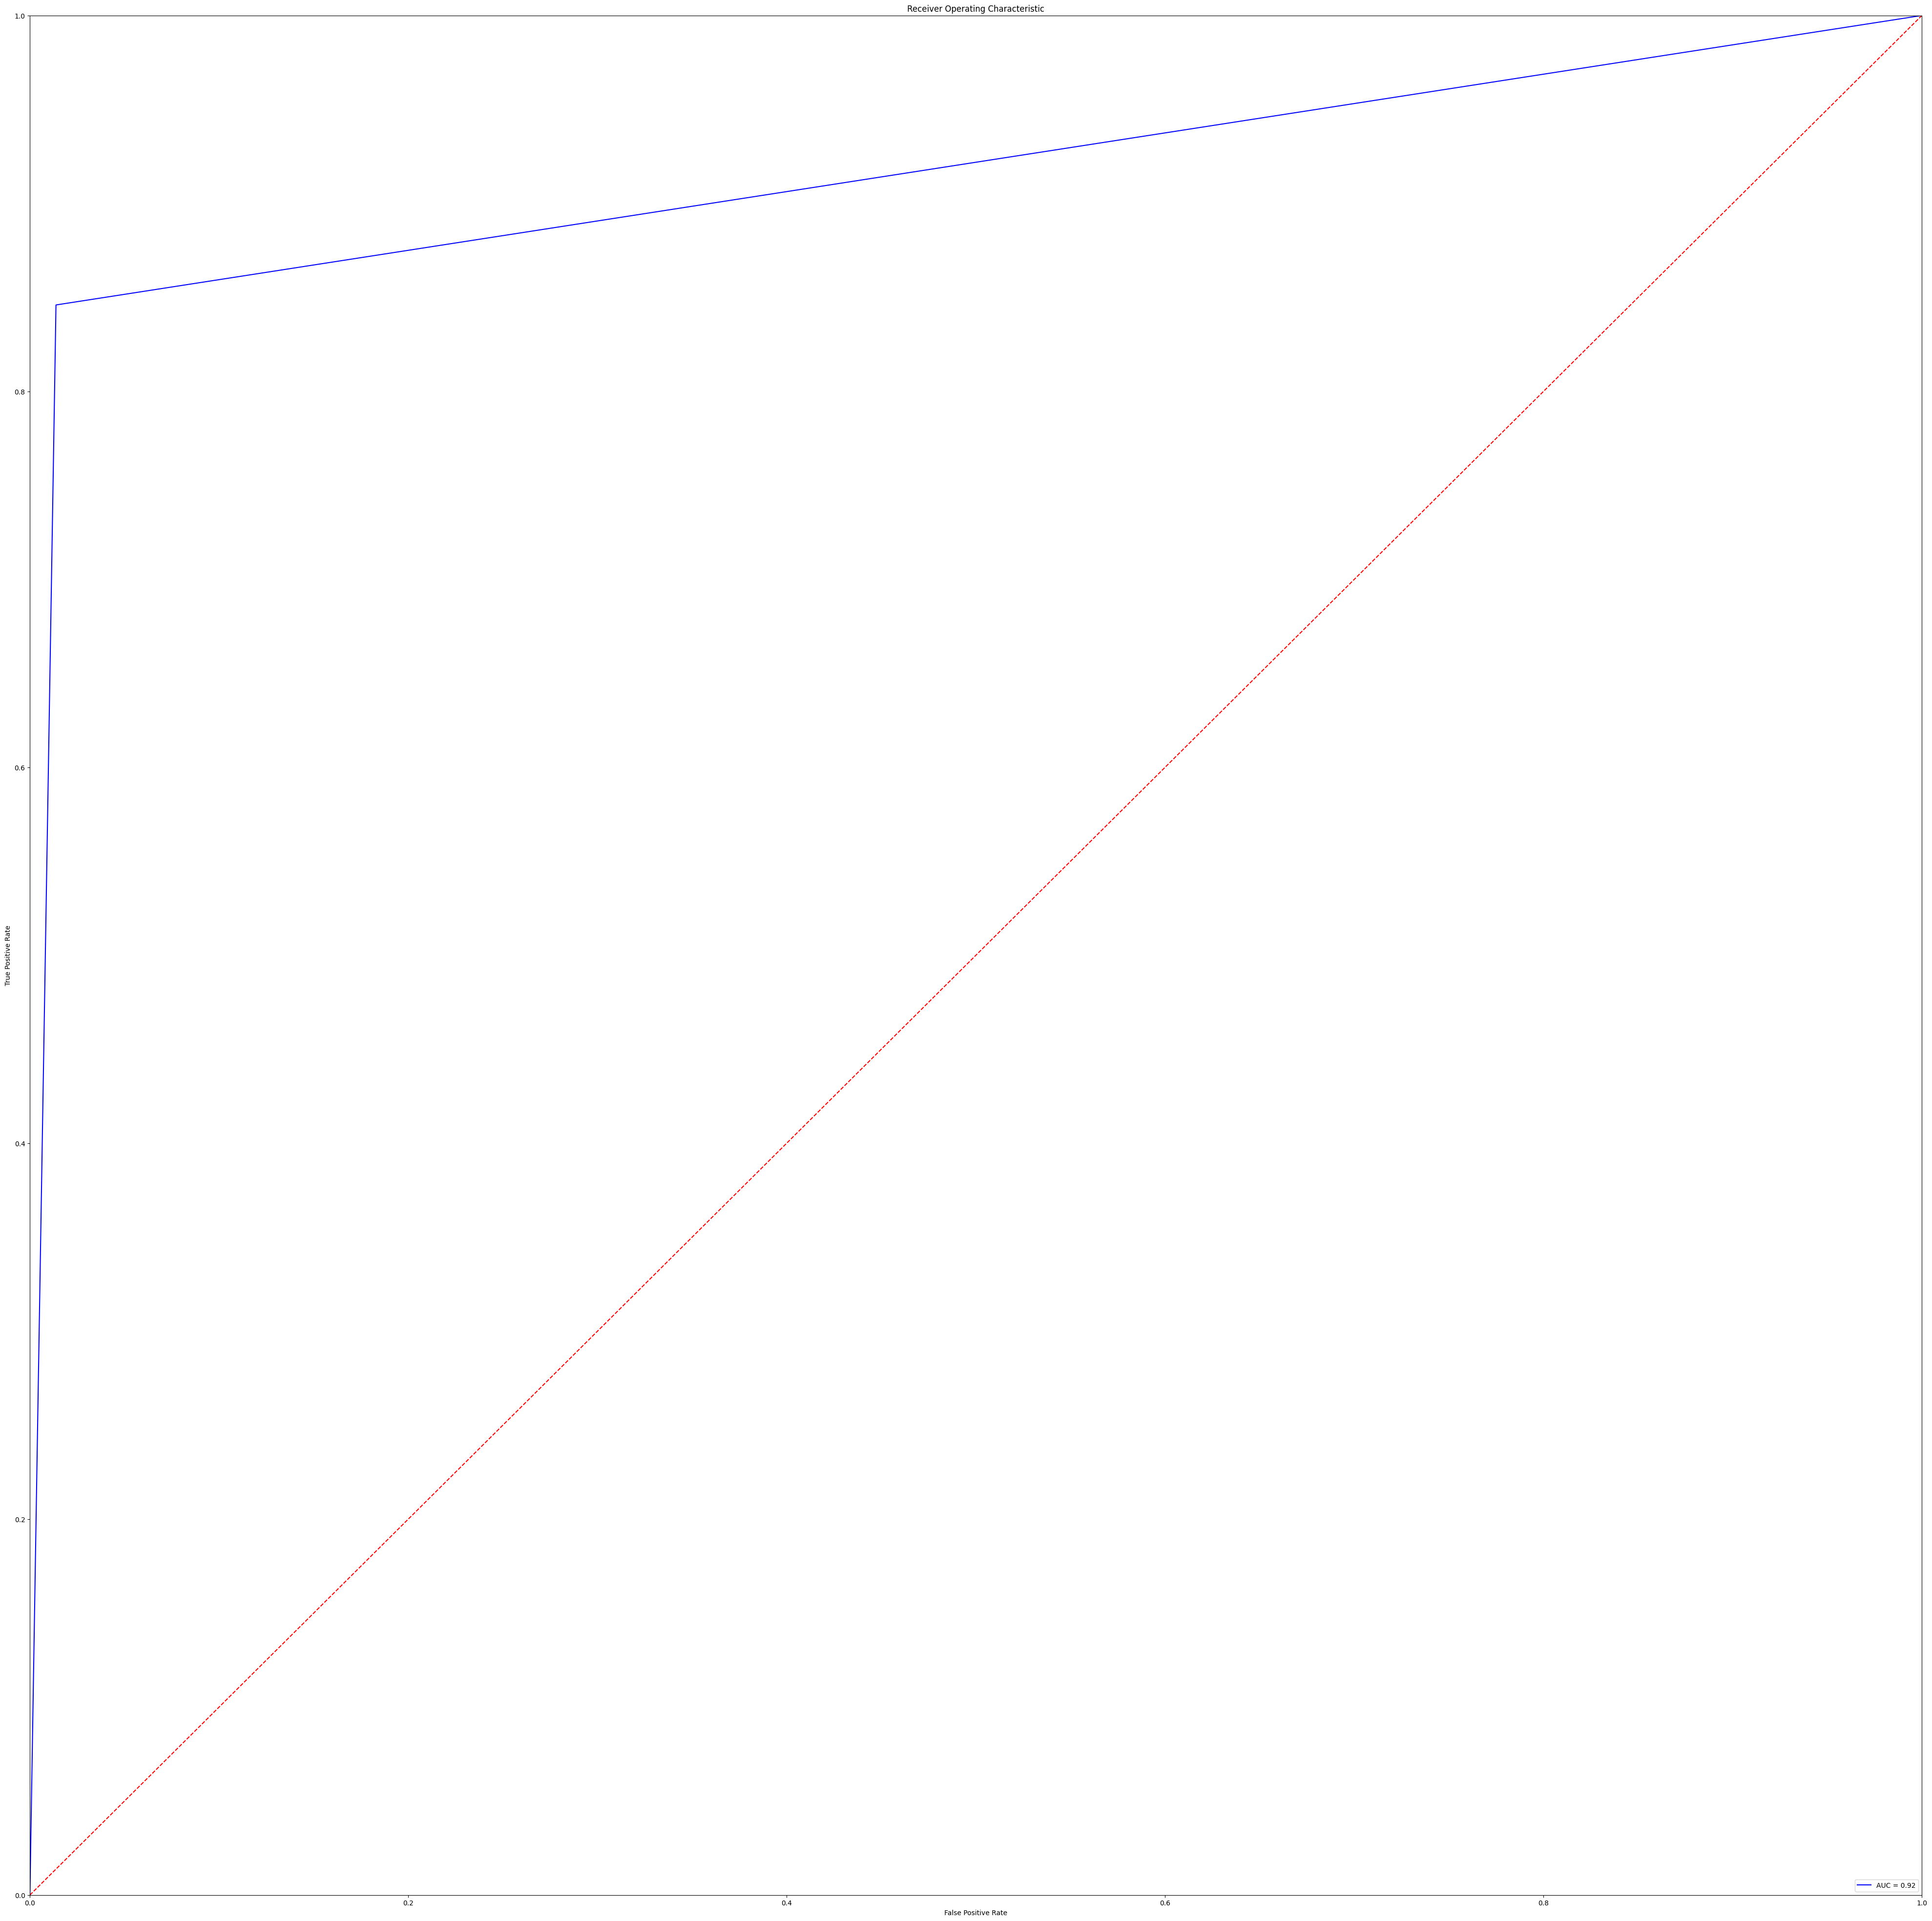

In [48]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
# we can use Random forest classifier
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. Humidity3pm (0.195700)
2. Pressure3pm (0.070692)
3. Humidity9am (0.064891)
4. Rainfall (0.064080)
5. Pressure9am (0.062535)
6. WindGustSpeed (0.061576)
7. Temp3pm (0.058734)
8. MinTemp (0.057424)
9. MaxTemp (0.055185)
10. Temp9am (0.052931)
11. Location (0.041393)
12. WindSpeed3pm (0.039860)
13. WindSpeed9am (0.037004)
14. RainToday (0.034911)
15. WindDir3pm (0.034819)
16. WindDir9am (0.034479)
17. WindGustDir (0.033783)


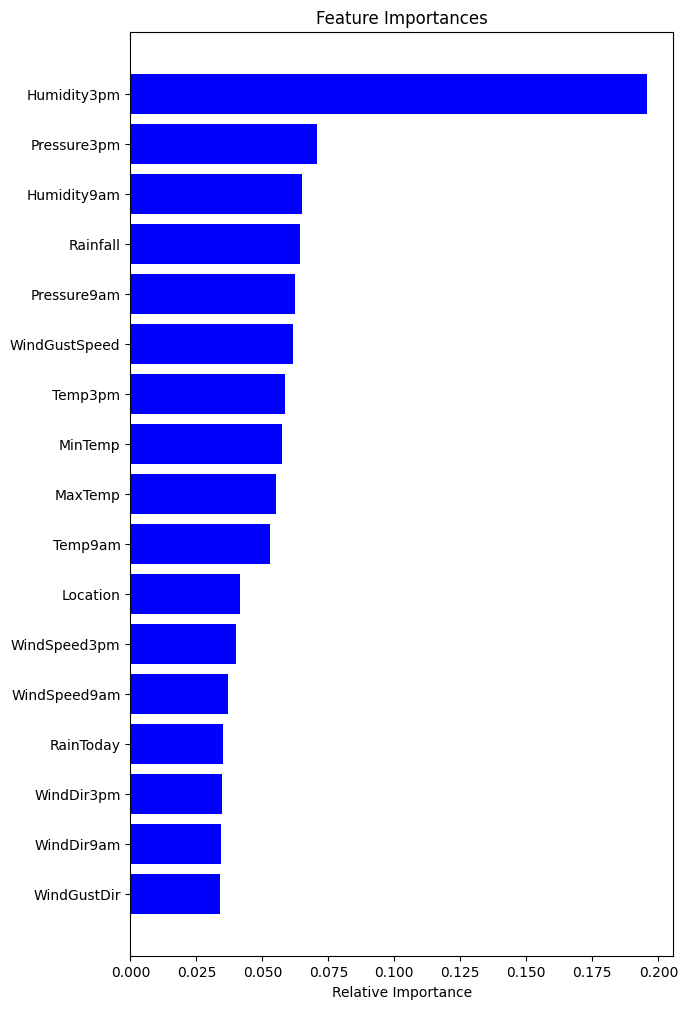

In [50]:
importances = classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(classifier, X_test, Y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Humidity3pm (0.144726)
2. WindGustSpeed (0.053263)
3. Pressure3pm (0.050774)
4. Humidity9am (0.039508)
5. Rainfall (0.038523)
6. Pressure9am (0.024599)
7. Temp3pm (0.022377)
8. MinTemp (0.020872)
9. WindDir3pm (0.014895)
10. WindDir9am (0.014768)
11. MaxTemp (0.014571)
12. RainToday (0.013207)
13. WindGustDir (0.012349)
14. Location (0.011842)
15. Temp9am (0.011814)
16. WindSpeed3pm (0.009128)
17. WindSpeed9am (0.007482)


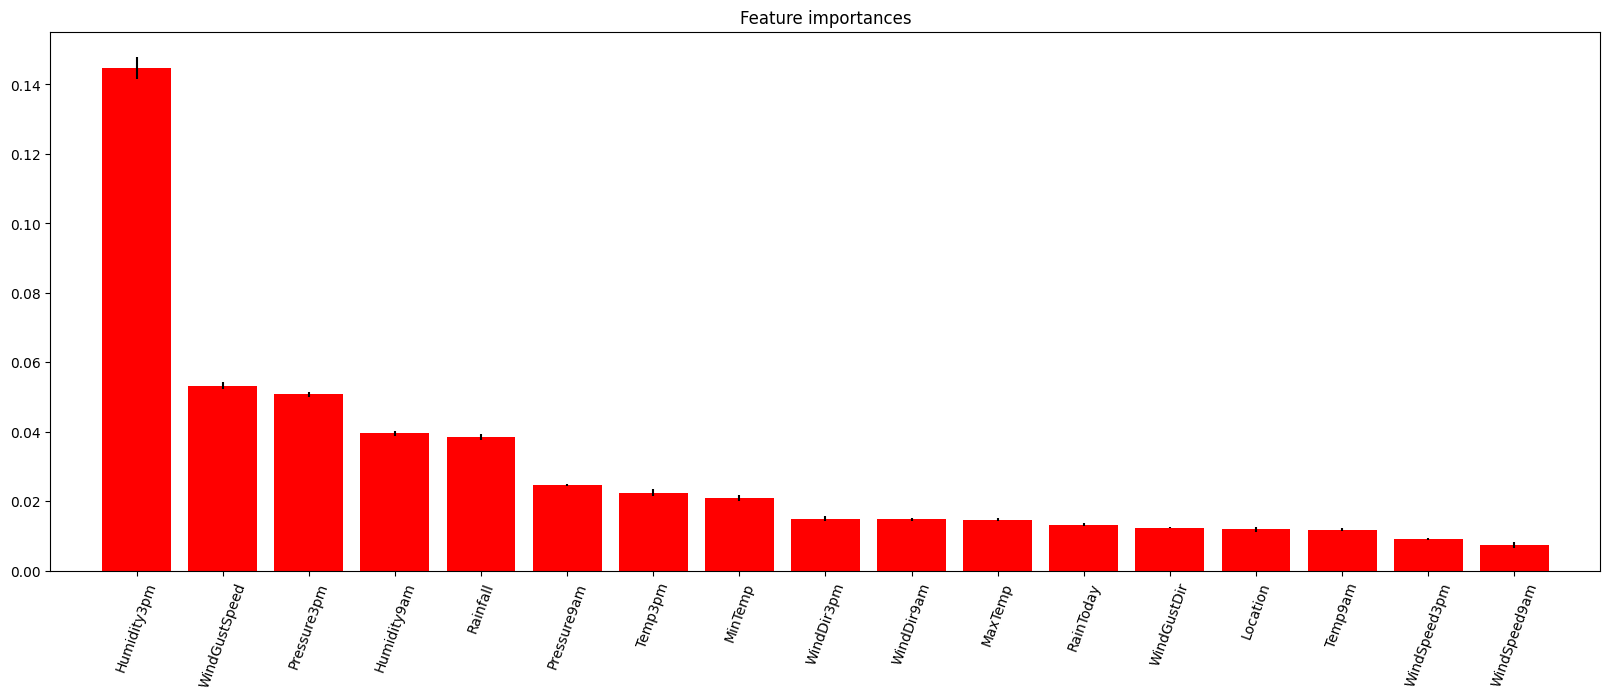

In [52]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()